In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.tools import diff

In [2]:
df = pd.read_csv('Data/airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.shape

(144, 1)

In [4]:
df.index.freq = 'MS'

In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
train_df = df[:108]
test_df = df[108:]

In [7]:
train_df.shape, test_df.shape

((108, 1), (36, 1))

In [8]:
fitted_model = ExponentialSmoothing(train_df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
fitted_model

In [9]:
fitted_model.fittedvalues

Month
1949-01-01    113.661752
1949-02-01    110.298603
1949-03-01    135.045576
1949-04-01    129.761781
1949-05-01    130.236575
1949-06-01    142.217565
1949-07-01    152.319166
1949-08-01    148.029103
1949-09-01    130.494083
1949-10-01    117.425492
1949-11-01    104.170778
1949-12-01    117.749217
1950-01-01    121.297788
1950-02-01    114.446025
1950-03-01    143.173884
1950-04-01    138.329844
1950-05-01    136.970281
1950-06-01    147.659978
1950-07-01    165.372938
1950-08-01    167.512769
1950-09-01    149.303207
1950-10-01    135.889043
1950-11-01    117.507837
1950-12-01    130.066640
1951-01-01    141.287583
1951-02-01    141.273737
1951-03-01    171.996203
1951-04-01    172.365171
1951-05-01    166.805919
1951-06-01    196.569089
                 ...    
1955-07-01    349.227492
1955-08-01    357.395401
1955-09-01    308.367406
1955-10-01    271.468140
1955-11-01    240.109833
1955-12-01    269.147884
1956-01-01    283.518777
1956-02-01    278.465877
1956-03-01    323.0

In [10]:
test_predictions = fitted_model.forecast(steps=36)
test_predictions

1958-01-01    348.204345
1958-02-01    341.572414
1958-03-01    397.790545
1958-04-01    388.670276
1958-05-01    391.783211
1958-06-01    451.357130
1958-07-01    502.150898
1958-08-01    498.397108
1958-09-01    439.422205
1958-10-01    383.519673
1958-11-01    336.907955
1958-12-01    381.282700
1959-01-01    392.159299
1959-02-01    384.690199
1959-03-01    448.004925
1959-04-01    437.733375
1959-05-01    441.239265
1959-06-01    508.333392
1959-07-01    565.539021
1959-08-01    561.311377
1959-09-01    494.891883
1959-10-01    431.932594
1959-11-01    379.436929
1959-12-01    429.413242
1960-01-01    441.662829
1960-02-01    433.250879
1960-03-01    504.558027
1960-04-01    492.989867
1960-05-01    496.938317
1960-06-01    572.501951
1960-07-01    636.928830
1960-08-01    632.167518
1960-09-01    557.363676
1960-10-01    486.456835
1960-11-01    427.334473
1960-12-01    483.619456
Freq: MS, dtype: float64

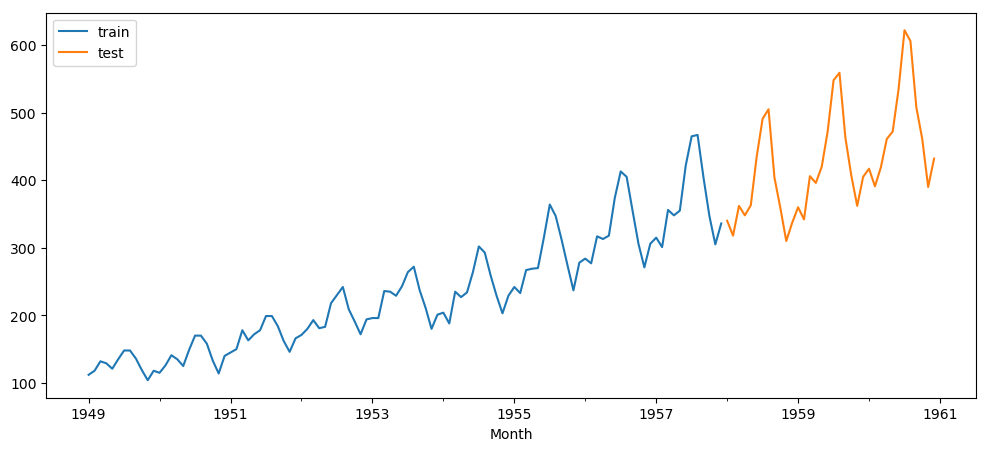

In [11]:
train_df['Thousands of Passengers'].plot(figsize=(12,5),legend=True,label='train')
test_df['Thousands of Passengers'].plot(figsize=(12,5),legend=True,label='test');

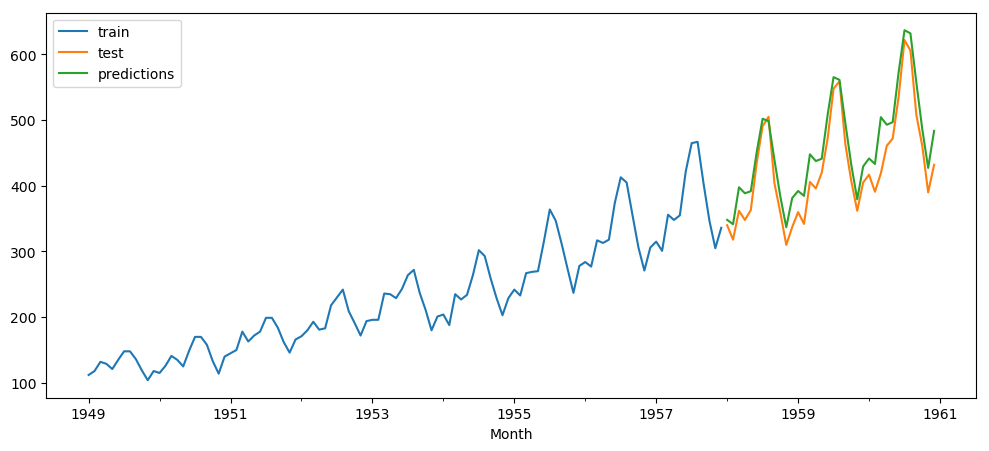

In [12]:
train_df['Thousands of Passengers'].plot(figsize=(12,5),legend=True,label='train')
test_df['Thousands of Passengers'].plot(figsize=(12,5),legend=True,label='test')
test_predictions.plot(figsize=(12,5),legend=True,label='predictions');

In [13]:
test_df

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


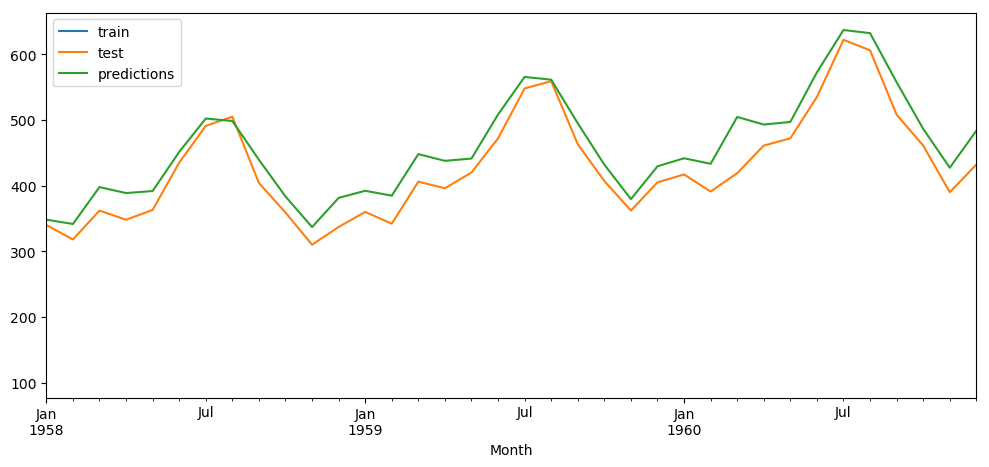

In [14]:
train_df['Thousands of Passengers'].plot(figsize=(12,5),legend=True,label='train')
test_df['Thousands of Passengers'].plot(figsize=(12,5),legend=True,label='test')
test_predictions.plot(figsize=(12,5),legend=True,label='predictions',xlim=['1958-01-01','1960-12-01']);

In [18]:
test_df.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [19]:
print("MAE:",mean_absolute_error(test_df,test_predictions))

MAE: 30.24228895401259


In [23]:
print("MSE:",mean_squared_error(test_df,test_predictions))

MSE: 1143.4649378653387


In [22]:
print("RMSE:",np.sqrt(mean_squared_error(test_df,test_predictions)))

RMSE: 33.815158403670665


In [24]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
final_model

In [25]:
final_model.fittedvalues

Month
1949-01-01    111.753654
1949-02-01    118.993207
1949-03-01    133.458671
1949-04-01    127.957617
1949-05-01    121.027379
1949-06-01    133.945650
1949-07-01    148.110617
1949-08-01    147.777654
1949-09-01    135.275549
1949-10-01    118.348410
1949-11-01    104.918101
1949-12-01    122.401775
1950-01-01    123.570719
1950-02-01    128.061550
1950-03-01    143.093184
1950-04-01    138.536174
1950-05-01    129.136424
1950-06-01    142.243312
1950-07-01    158.327146
1950-08-01    161.610279
1950-09-01    150.439795
1950-10-01    133.347879
1950-11-01    116.986821
1950-12-01    133.708529
1951-01-01    135.619770
1951-02-01    150.940632
1951-03-01    169.287661
1951-04-01    166.030855
1951-05-01    154.516520
1951-06-01    185.617683
                 ...    
1958-07-01    481.161909
1958-08-01    478.205379
1958-09-01    420.102431
1958-10-01    357.462732
1958-11-01    314.791487
1958-12-01    350.297496
1959-01-01    355.135451
1959-02-01    339.863111
1959-03-01    396.6

In [26]:
forecast_predictions = final_model.forecast(36)
forecast_predictions

1961-01-01    450.696219
1961-02-01    424.853976
1961-03-01    475.608791
1961-04-01    504.080734
1961-05-01    517.915698
1961-06-01    590.236094
1961-07-01    684.291449
1961-08-01    678.113089
1961-09-01    567.149020
1961-10-01    507.822588
1961-11-01    434.746577
1961-12-01    485.997796
1962-01-01    502.787057
1962-02-01    473.958004
1962-03-01    530.578989
1962-04-01    562.341679
1962-05-01    577.775669
1962-06-01    658.454755
1962-07-01    763.380896
1962-08-01    756.488451
1962-09-01    632.699310
1962-10-01    566.516012
1962-11-01    484.993978
1962-12-01    542.168741
1963-01-01    560.898481
1963-02-01    528.737406
1963-03-01    591.902566
1963-04-01    627.336343
1963-05-01    644.554172
1963-06-01    734.558034
1963-07-01    851.611392
1963-08-01    843.922327
1963-09-01    705.825811
1963-10-01    631.993140
1963-11-01    541.048903
1963-12-01    604.831845
Freq: MS, dtype: float64

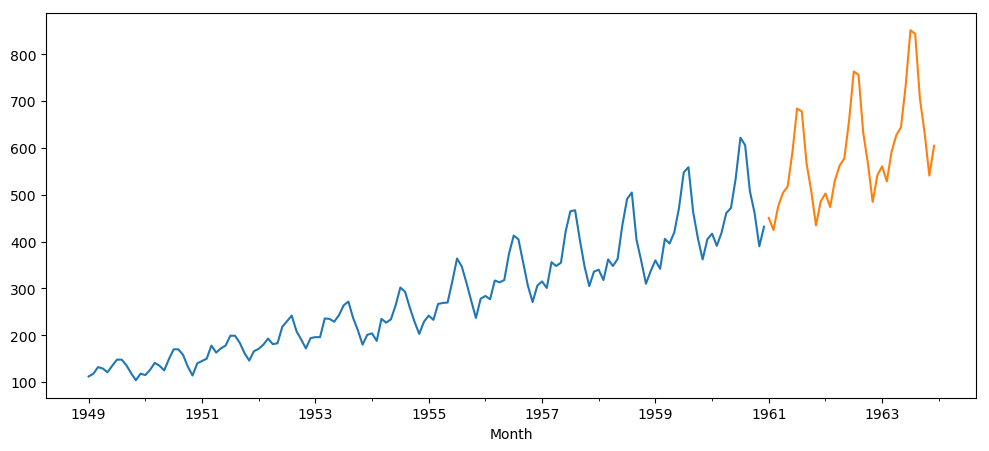

In [27]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_predictions.plot(figsize=(12,5));

In [28]:
df2 = pd.read_csv('Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


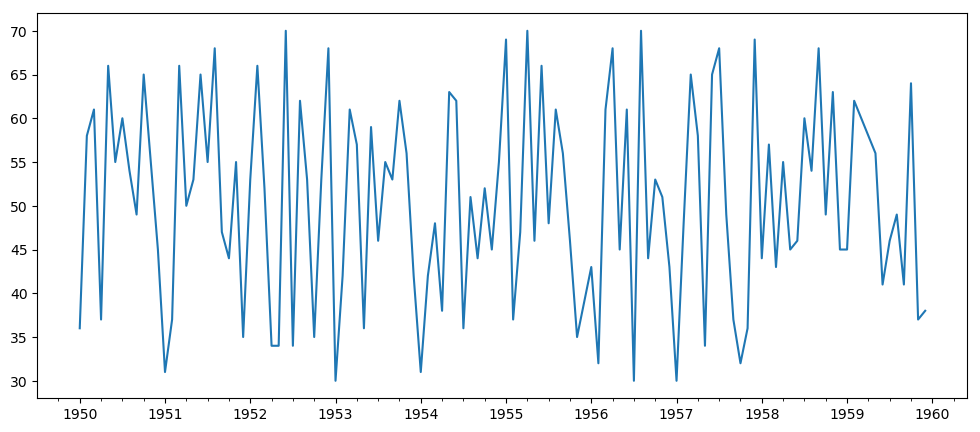

In [29]:
df2.a.plot(figsize=(12,5));

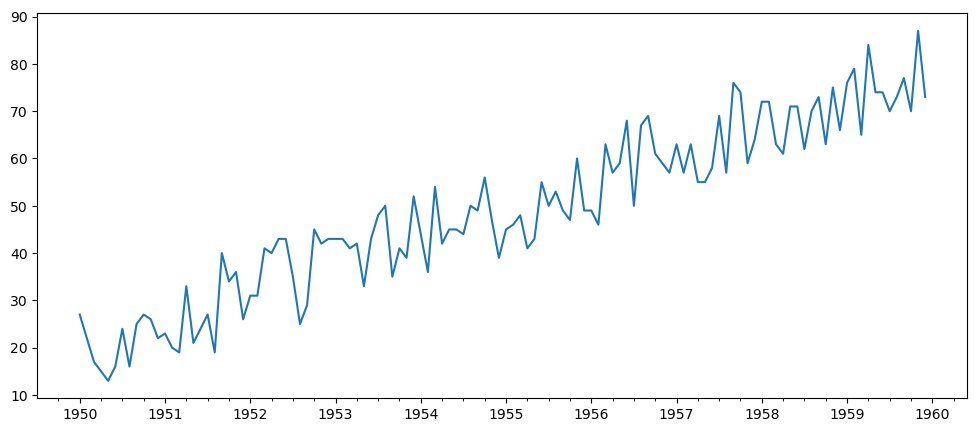

In [30]:
df2.b.plot(figsize=(12,5));

In [32]:
df2.b - df2.b.shift(1) # First Order Diff

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
1950-07-01     8.0
1950-08-01    -8.0
1950-09-01     9.0
1950-10-01     2.0
1950-11-01    -1.0
1950-12-01    -4.0
1951-01-01     1.0
1951-02-01    -3.0
1951-03-01    -1.0
1951-04-01    14.0
1951-05-01   -12.0
1951-06-01     3.0
1951-07-01     3.0
1951-08-01    -8.0
1951-09-01    21.0
1951-10-01    -6.0
1951-11-01     2.0
1951-12-01   -10.0
1952-01-01     5.0
1952-02-01     0.0
1952-03-01    10.0
1952-04-01    -1.0
1952-05-01     3.0
1952-06-01     0.0
              ... 
1957-07-01    11.0
1957-08-01   -12.0
1957-09-01    19.0
1957-10-01    -2.0
1957-11-01   -15.0
1957-12-01     5.0
1958-01-01     8.0
1958-02-01     0.0
1958-03-01    -9.0
1958-04-01    -2.0
1958-05-01    10.0
1958-06-01     0.0
1958-07-01    -9.0
1958-08-01     8.0
1958-09-01     3.0
1958-10-01   -10.0
1958-11-01    12.0
1958-12-01    -9.0
1959-01-01    10.0
1959-02-01     3.0
1959-03-01   -14.0
1959-04-01  

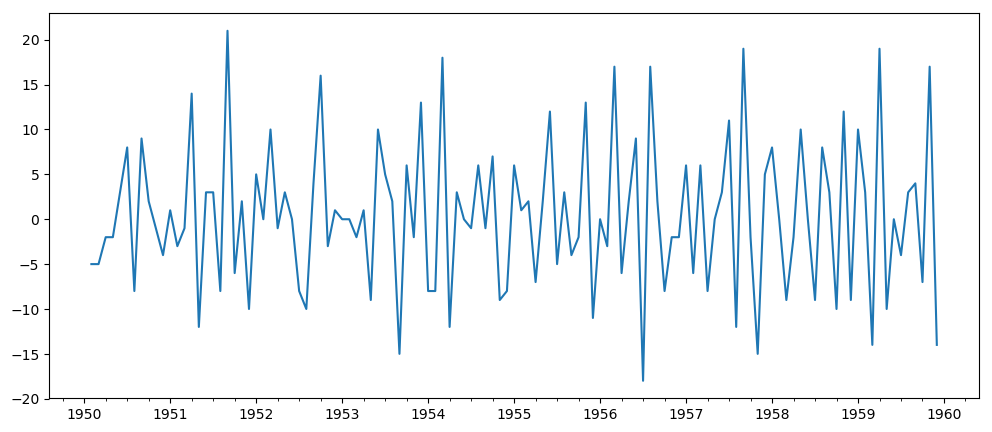

In [34]:
diff(df2['b'],k_diff=1).plot(figsize=(12,5));